In [184]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [185]:
data_path = os.path.join(os.getcwd(),'data','regression_part1.csv')
regression_1 = pd.read_csv(data_path, delimiter=',')

In [186]:
regression_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
revision_time    50 non-null float64
exam_score       50 non-null float64
dtypes: float64(2)
memory usage: 880.0 bytes


In [187]:
regression_1.head()

,revision_time,exam_score
0,2.723,27.682
1,2.844,22.998
2,3.303,19.765
3,3.588,24.481
4,4.050,22.974


In [188]:
training_inputs = regression_1.iloc[:].values

In [189]:
type(training_inputs)

numpy.ndarray

In [190]:
len(training_inputs)

50

In [191]:
training_inputs[4]

array([ 4.05 , 22.974])

In [192]:
training_inputs.shape

(50, 2)

In [193]:
l = [[1,x,y] for [x,y] in training_inputs]
X = np.array(l, dtype=float)
np.shape(X)

(50, 3)

In [194]:
X[0]

array([ 1.   ,  2.723, 27.682])

In [195]:
phi_revision_time = X[:,0:2]
phi_revision_time.shape

(50, 2)

In [196]:
phi_revision_time[0]

array([1.   , 2.723])

In [197]:
y = X[:,2:3]
y.shape

(50, 1)

In [198]:
y[0]

array([27.682])

In [199]:
reg = LinearRegression(fit_intercept=False).fit(phi_revision_time, y)

In [200]:
reg.coef_

array([[17.89768026,  1.44114091]])

In [201]:
a = np.subtract(np.array([1,2]),np.array([5,3]))
np.square(a)

array([16,  1])

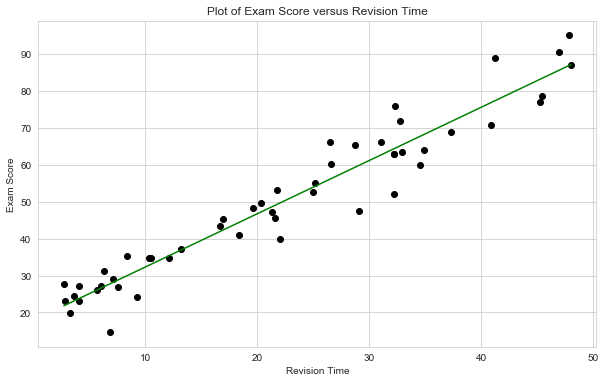

In [202]:
plt.scatter(X[:,1:2], y, color = "black")
plt.plot(X[:,1:2], reg.predict(X[:,0:2]), color = "green")
plt.title("Plot of Exam Score versus Revision Time")
plt.xlabel("Revision Time")
plt.ylabel("Exam Score")
plt.savefig('exam_score_vs_revision_time.svg')
plt.show()

In [203]:
phi = np.array([[1.,x] for [x,y] in regression_1[:].values])
y = np.array([y for [x,y] in regression_1[:].values])
phi_T_phi_inv = np.linalg.inv(phi.T.dot(phi))
w = (phi_T_phi_inv.dot(phi.T)).dot(y)
w

array([17.89768026,  1.44114091])

In [204]:
phi_revision_time[0]

array([1.   , 2.723])

In [205]:
regression_1[:].values.shape

(50, 2)

In [206]:
regression_1[:].values[0]

array([ 2.723, 27.682])

In [207]:
import copy
w_cf = copy.deepcopy(w)
w_skl = copy.deepcopy(reg.coef_)

In [208]:
w_cf

array([17.89768026,  1.44114091])

In [209]:
w_skl

array([[17.89768026,  1.44114091]])

In [210]:
n = len(regression_1)
n

50

In [211]:
residuals = np.subtract(y, phi.dot(w_cf))
mse_cf =(1/n) * sum(np.square(residuals))
mse_cf

30.985472614541287

In [212]:

r = np.subtract(y, reg.predict(X[:,0:2]))
y.reshape(50,1)
y.shape

(50,)

In [213]:
reg.predict(X[:,0:2]).reshape(50,1)
reg.predict(X[:,0:2]).shape

(50, 1)

In [214]:
y

array([27.682, 22.998, 19.765, 24.481, 22.974, 27.086, 26.136, 27.038,
       31.283, 14.731, 28.946, 26.901, 35.299, 24.228, 34.651, 34.667,
       34.848, 37.266, 43.491, 45.201, 40.924, 48.321, 49.574, 47.239,
       45.582, 53.182, 39.956, 52.697, 54.9  , 66.065, 60.068, 65.432,
       47.34 , 66.051, 62.916, 62.892, 52.066, 75.787, 71.807, 63.339,
       59.794, 63.983, 68.714, 70.767, 88.973, 76.957, 78.698, 90.384,
       94.945, 86.968])

In [215]:
y_hat = [x for [x] in reg.predict(X[:,0:2])]
y_hat = np.array(y_hat)
y_hat.shape

(50,)

In [216]:
residuals = np.subtract(y, y_hat)
mse_skl = (1/n) * sum(np.square(residuals))
mse_skl

30.9854726145413

In [217]:
y_hat

array([21.82190694, 21.99628499, 22.65776867, 23.06849383, 23.73430093,
       23.77753515, 26.07471376, 26.63099415, 27.04460159, 27.72482009,
       28.12689841, 28.72785416, 29.93985366, 31.17635256, 32.8336646 ,
       33.04407117, 35.3383675 , 36.90200538, 41.95320425, 42.36392941,
       44.31379306, 46.14260086, 47.1831046 , 48.56515873, 48.99461872,
       49.31166972, 49.67195494, 53.85270471, 54.13805061, 56.08070855,
       56.13835418, 59.23968941, 59.77002927, 62.63501739, 64.26783003,
       64.30674084, 64.33988708, 64.400415  , 65.03884042, 65.29104007,
       67.60118895, 68.17764531, 71.65079489, 76.80431477, 77.34330147,
       83.05598402, 83.32115394, 85.52033496, 86.81015607, 87.08829627])

In [218]:
w_0 = 20
W_1 = np.linspace(-2,2,100)

In [219]:
len(W_1)

100

In [220]:
W = [[20,w1] for w1 in W_1]
phi[0]

array([1.   , 2.723])

In [221]:
errors = []
for w in W:
    y_hat = phi.dot(w)
    residuals = np.subtract(y, y_hat)
    error = (1/n) * sum(np.square(residuals))
    errors.append((w[1], error))

In [222]:
errors[0]

(-2.0, 7830.3758159)

In [223]:
len(errors)

100

In [224]:
errors[75]

(1.0303030303030307, 112.71372403590425)

In [225]:
errors[80]

(1.2323232323232327, 45.78395850095901)

In [226]:
a = [x for (x,y) in errors]
b = [y for (x,y) in errors]
b[85]

34.80182303967966

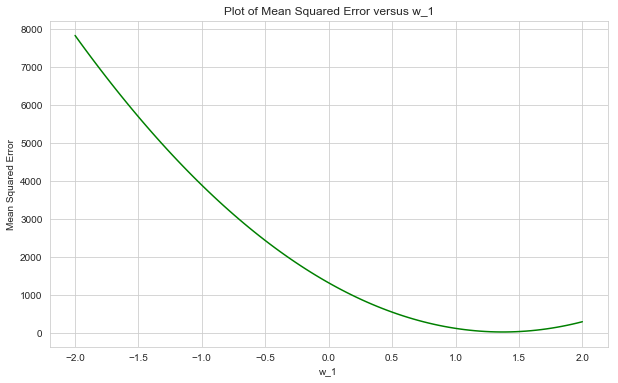

In [227]:
plt.plot(a, b, color = "green")
plt.title("Plot of Mean Squared Error versus w_1")
plt.xlabel("w_1")
plt.ylabel("Mean Squared Error")
plt.savefig('mse_w1.svg')
plt.show()

In [228]:
y[0]

27.682

In [229]:
from sklearn.preprocessing import PolynomialFeatures

In [230]:
data_path = os.path.join(os.getcwd(),'data','regression_part2.csv')
regression_2 = pd.read_csv(data_path, delimiter=',')

In [231]:
training_inputs2 = regression_2.iloc[:].values

In [232]:
l = [[x,y] for [x,y] in training_inputs2]
X = np.array(l, dtype=float)
np.shape(X)

(25, 2)

In [233]:
regression_2.head()

,input,output
0,2.728,9.088
1,3.244,12.786
2,-4.164,-10.016
3,4.875,32.976
4,3.329,10.437


In [234]:
X[:5]

array([[  2.728,   9.088],
       [  3.244,  12.786],
       [ -4.164, -10.016],
       [  4.875,  32.976],
       [  3.329,  10.437]])

In [235]:
y = [y for [y] in X[:,1:2]]
y[:5]

[9.088, 12.786, -10.016, 32.976, 10.437000000000001]

In [236]:
x = [x for [x] in X[:,0:1]]
x[:5]

[2.728, 3.2439999999999998, -4.164, 4.875, 3.3289999999999997]

In [237]:
type(y)

list

In [238]:
pairs = list(zip(x,y))

In [239]:
pairs[:5]

[(2.728, 9.088),
 (3.2439999999999998, 12.786),
 (-4.164, -10.016),
 (4.875, 32.976),
 (3.3289999999999997, 10.437000000000001)]

In [240]:
pairs.sort()

In [241]:
pairs[20:24]

[(3.8739999999999997, 15.765),
 (4.268, 21.680999999999997),
 (4.31, 25.919),
 (4.441, 24.914)]

In [242]:
x = np.array([[x] for (x,y) in pairs])

In [243]:
type(x)

numpy.ndarray

In [244]:
y = np.array([[y] for (x,y) in pairs])
type(y)

numpy.ndarray

In [245]:
x.shape

(25, 1)

In [246]:
x[:4]

array([[-4.826],
       [-4.616],
       [-4.164],
       [-3.772]])

In [247]:
linear = PolynomialFeatures(degree=1)

In [248]:
x_linear = linear.fit_transform(x)

In [249]:
model = LinearRegression(fit_intercept=False).fit(x_linear, y)

In [250]:
y_linear_pred = model.predict(x_linear)

In [251]:
quadratic = PolynomialFeatures(degree=2)

In [252]:
x_quadratic = quadratic.fit_transform(x)

In [253]:
model = LinearRegression(fit_intercept=False).fit(x_quadratic, y)

In [254]:
y_quadratic_pred = model.predict(x_quadratic)

In [255]:
cubic = PolynomialFeatures(degree=3)
x_cubic = cubic.fit_transform(x)

In [256]:
model = LinearRegression(fit_intercept=False).fit(x_cubic, y)

In [257]:
y_cubic_pred = model.predict(x_cubic)

In [258]:
quartic = PolynomialFeatures(degree=4)
x_quartic = quartic.fit_transform(x)

In [259]:
model = LinearRegression(fit_intercept=False).fit(x_quartic, y)

In [260]:
y_quartic_pred = model.predict(x_quartic)

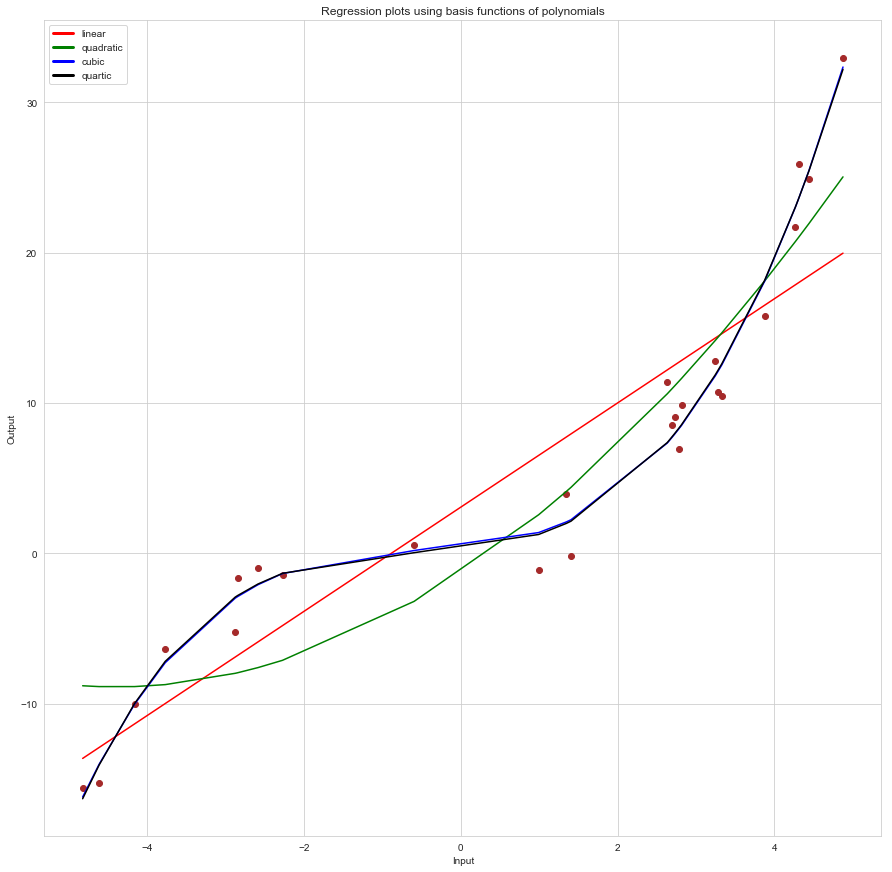

In [261]:
from matplotlib.lines import Line2D

plt.rcParams['figure.figsize'] = (15, 15)
plt.scatter(x, y, color = "brown")
plt.plot(x, y_linear_pred, color = "red")
plt.plot(x, y_quadratic_pred, color = "green")
plt.plot(x, y_cubic_pred, color = "blue")
plt.plot(x, y_quartic_pred, color = "black")
plt.title("Regression plots using basis functions of polynomials")
plt.xlabel("Input")
plt.ylabel("Output")

colors = ['red', 'green', 'blue', 'black']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['linear', 'quadratic', 'cubic', 'quartic']
plt.legend(lines, labels)

plt.savefig('non_linear_regression.svg')
plt.show()

In [262]:
from sklearn.metrics import mean_squared_error
sns.set_style(style='whitegrid')

In [263]:
mse_linear = mean_squared_error(y, y_linear_pred)
mse_linear

24.744378032672856

In [264]:
mse_quadratic = mean_squared_error(y, y_quadratic_pred)
mse_quadratic

17.352926937873296

In [265]:
mse_cubic = mean_squared_error(y, y_cubic_pred)
mse_cubic

2.7447567192524263

In [266]:
mse_quartic = mean_squared_error(y, y_quartic_pred)
mse_quartic

2.7389111790755374

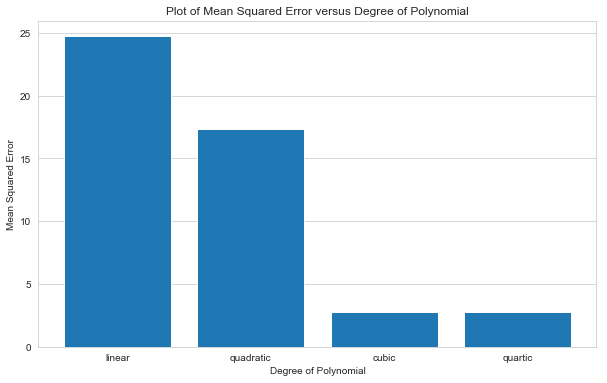

In [267]:
categories = np.array([1,2,3,4])
labels = ['linear','quadratic','cubic','quartic']
errors = [mse_linear, mse_quadratic, mse_cubic, mse_quartic]

plt.rcParams['figure.figsize'] = (10, 6)
fig, ax = plt.subplots()
ax.bar(categories, errors)

ax.set_xticks(categories)
ax.set_xticklabels(labels)
ax.set_xlabel('Degree of Polynomial')

ax.yaxis.grid(True)
ax.xaxis.grid(False)

ax.set_ylabel('Mean Squared Error')

ax.set_title('Plot of Mean Squared Error versus Degree of Polynomial')

plt.savefig('mse_non_linear_regression.svg')
plt.show()

In [634]:
data_path = os.path.join(os.getcwd(),'data','regression_part2.csv')
regression_2 = pd.read_csv(data_path, delimiter=',')

In [635]:
regression_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
input     25 non-null float64
output    25 non-null float64
dtypes: float64(2)
memory usage: 480.0 bytes


In [636]:
regression_2.head()

,input,output
0,2.728,9.088
1,3.244,12.786
2,-4.164,-10.016
3,4.875,32.976
4,3.329,10.437


In [637]:
X = regression_2['input'].values

In [638]:
Y = regression_2['output'].values

In [639]:
X = np.array([x for (x,y) in pairs])
X

array([-4.826, -4.616, -4.164, -3.772, -2.879, -2.848, -2.588, -2.276,
       -0.597,  0.992,  1.345,  1.405,  2.633,  2.688,  2.728,  2.78 ,
        2.815,  3.244,  3.276,  3.329,  3.874,  4.268,  4.31 ,  4.441,
        4.875])

In [640]:
Y = np.array([y for (x,y) in pairs])
Y

array([-15.577, -15.291, -10.016,  -6.342,  -5.204,  -1.673,  -0.988,
        -1.465,   0.536,  -1.133,   3.977,  -0.154,  11.382,   8.539,
         9.088,   6.929,   9.853,  12.786,  10.743,  10.437,  15.765,
        21.681,  25.919,  24.914,  32.976])

In [641]:
alpha_1 = 20000
alpha_2 = 15
alpha_3 = 35

In [642]:
c_1 = -4.0
c_2 = -2.0
c_3 = 2.0
c_4 = 4.0

In [643]:
def rbf(x,c,a):
    return np.exp(-0.5*((x-c)**2)/(a**2))

In [644]:
def RBF(x, alpha):
    return np.array([1, rbf(x,c_1,alpha), rbf(x,c_2,alpha), rbf(x,c_3,alpha), rbf(x,c_4,alpha)])

In [645]:
phi_1 = np.array([RBF(x, alpha_1) for x in X])

In [646]:
phi_2 = np.array([RBF(x, alpha_2) for x in X])

In [647]:
phi_3 = np.array([RBF(x, alpha_3) for x in X])

In [648]:
def get_w(phi, y):
    phi_T_phi_inv = np.linalg.inv(phi.T.dot(phi))
    w = (phi_T_phi_inv.dot(phi.T)).dot(y)
    return w

In [649]:
w_1 = get_w(phi_1, Y)
w_2 = get_w(phi_2, Y)
w_3 = get_w(phi_3, Y)

In [650]:
y_pred_1 = phi_1.dot(w_1)
y_pred_2 = phi_2.dot(w_2)
y_pred_3 = phi_3.dot(w_3)

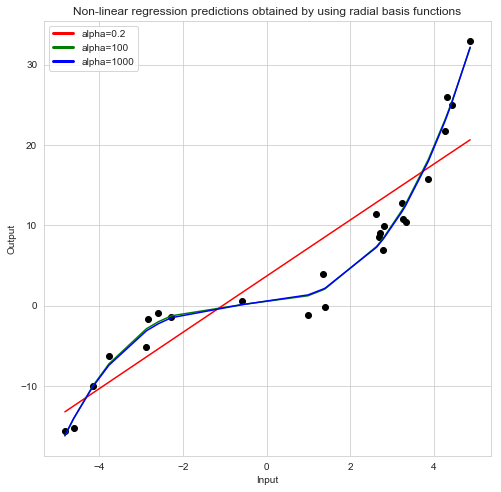

In [651]:
plt.rcParams['figure.figsize'] = (8, 8)
plt.scatter(X, Y, color = "black")
plt.plot(X, y_pred_1, color = "red")
plt.plot(X, y_pred_2, color = "green")
plt.plot(X, y_pred_3, color = "blue")
plt.title("Non-linear regression predictions obtained by using radial basis functions")
plt.xlabel("Input")
plt.ylabel("Output")

colors = ['red', 'green', 'blue']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['alpha=0.2', 'alpha=100', 'alpha=1000']
plt.legend(lines, labels)

plt.grid(True)

plt.savefig('non_linear_regression_RBFs.svg')
plt.show()

In [652]:
error_1 = mean_squared_error(Y, y_pred_1)
error_2 = mean_squared_error(Y, y_pred_2)
error_3 = mean_squared_error(Y, y_pred_3)

In [653]:
error_1

25.168544799644277

In [654]:
error_2

2.757488638727246

In [655]:
error_3

2.7654185504756303

In [52]:
x = [-3.187885,-3.188801,-3.188704,-3.189138,-3.189812,-3.190294,-3.189619,-3.188945,-3.188271,-3.191161,-3.190197,-3.191161,-3.190727,-3.187982,-3.187693,-3.187355,-3.187211,-3.185573,-3.185621,-3.185814,-3.184803,-3.18514,-3.185525,-3.185236,-3.184465,-3.186392,-3.186777,-3.185043,-3.185332,-3.186729,-3.186922,-3.187404,-3.188319]
y = [55.944709,55.945437,55.945168,55.944197,55.94409,55.943712,55.94382,55.943928,55.944063,55.943362,55.943443,55.943065,55.943092,55.943497,55.942769,55.943604,55.943335,55.942877,55.943065,55.943551,55.943173,55.943685,55.943982,55.944575,55.944952,55.944656,55.944575,55.945868,55.946138,55.945653,55.945437,55.945949,55.945518]

In [98]:
i = [-3.187902606042998,-3.1881324193759335,-3.188362232708869,-3.188592046041805,-3.1888218593747406,-3.1886718593747405,-3.188774465417738,-3.1888770714607357,-3.189027071460736,-3.189177071460736,-3.1894725137866398,-3.18977251378664,-3.1900023271195757,-3.190262134740711,-3.1899666924148073,-3.1896712500889035,-3.1893758077629997,-3.189080365437096,-3.188784923111192,-3.188489480785288,-3.1881940384593843,-3.18847594624562,-3.1887578540318557,-3.1890397618180915,-3.189321669604327,-3.189617111930231,-3.189912554256135,-3.1902079965820387,-3.1905034389079425,-3.1907988812338464,-3.19109432355975,-3.1907988812338464,-3.1905034389079425,-3.1902034389079423,-3.190463246529078,-3.1907451543153136,-3.1910270621015493,-3.190727062101549,-3.1904316197756453,-3.1901361774497414,-3.1898407351238376,-3.1895452927979338,-3.18924985047203,-3.188954408146126,-3.1886589658202222,-3.1883635234943184,-3.188063523494318,-3.187913523494318,-3.187763523494318,-3.1876609174513204,-3.1876088229980204,-3.187506216955023,-3.187403610912025,-3.1872107746291194,-3.1869153323032156,-3.186337982191076,-3.186042539865172,-3.1857606320789364,-3.185500824457801,-3.185650824457801,-3.1857534305007986,-3.185457988174895,-3.185162545848991,-3.184867103523087,-3.185059939805993,-3.1851625458489905,-3.185422353470126,-3.185370259016826,-3.185318164563526,-3.1850583569423905,-3.184798549321255,-3.1845387417001194,-3.1848341840260233,-3.185129626351927,-3.185425068677831,-3.1857205110037348,-3.1860159533296386,-3.1863113956555424,-3.1866113956555426,-3.186381582322607,-3.1861517689896712,-3.1859219556567355,-3.1856921423238,-3.185462328990864,-3.1852325156579284,-3.184972708036793,-3.1852325156579284,-3.185514423444164,-3.1857963312304,-3.1860782390166356,-3.1863736813425394,-3.1866691236684432,-3.186861959951349,-3.1870917732842847,-3.1873215866172204,-3.187603494403456,-3.187885402189692,-3.1881673099759276]
j = [55.94468190778624,55.944874744069146,55.94506758035205,55.94526041663496,55.945453252917865,55.94519344529673,55.94491153751049,55.944629629724254,55.94436982210312,55.944110014481986,55.94405792002868,55.94405792002868,55.94386508374578,55.94371508374578,55.94376717819908,55.943819272652384,55.943871367105686,55.94392346155899,55.94397555601229,55.94402765046559,55.944079744918895,55.943977138875894,55.94387453283289,55.94377192678989,55.94366932074689,55.94361722629359,55.94356513184029,55.943513037386985,55.94346094293368,55.94340884848038,55.94335675402708,55.94340884848038,55.94346094293368,55.94346094293368,55.943310942933685,55.943208336890685,55.943105730847684,55.943105730847684,55.943157825300986,55.94320991975429,55.94326201420759,55.94331410866089,55.943366203114195,55.9434182975675,55.9434703920208,55.9435224864741,55.9435224864741,55.94326267885297,55.94300287123183,55.942720963445595,55.9430164057715,55.94329831355774,55.94358022134398,55.94335040801104,55.94329831355774,55.94314361306144,55.943091518608135,55.942988912565134,55.942838912565136,55.94309872018627,55.94338062797251,55.94332853351921,55.943276439065905,55.9432243446126,55.94345415794554,55.94373606573178,55.943886065731775,55.94418150805768,55.94447695038359,55.94462695038359,55.944776950383584,55.94492695038358,55.94487485593028,55.94482276147698,55.944770667023676,55.94471857257037,55.94466647811707,55.94461438366377,55.94461438366377,55.944807219946675,55.94500005622958,55.94519289251249,55.945385728795394,55.9455785650783,55.945771401361206,55.945921401361204,55.9460714013612,55.9459687953182,55.9458661892752,55.9457635832322,55.9457114887789,55.945659394325595,55.94542958099266,55.945622417275565,55.94581525355847,55.94571264751547,55.94561004147247,55.94550743542947]


In [99]:
longs = [-3.192473,-3.192473, -3.184319, -3.184319, -3.192473]
lats = [55.946233, 55.942617, 55.942617,55.946233 ,55.946233 ]

In [100]:
no_fly_1_x = [-3.1871804594993587,-3.187042325735092,-3.1869766116142273,-3.186897486448288,-3.186330199241638,-3.186405301094055,-3.1863033771514893,-3.1863395869731903,-3.186409324407577,-3.186425417661667,-3.186226934194565,-3.1863945722579956,-3.1864307820796967,-3.186488449573517,-3.1871804594993587]
no_fly_1_y = [55.94448750356385,55.944193856370475,55.94420361961219,55.94404815847112,55.94413227278919,55.944296745793935,55.944311015108454,55.94437109637507,55.94436208419099,55.944397381899876,55.94442366740687,55.94457011490493,55.94458588614092,55.94459189422912,55.94448750356385]

In [101]:
no_fly_2_x = [-3.186697661876678,-3.186556175351143,-3.186345621943474,-3.1864864379167557,-3.186697661876678]
no_fly_2_y = [55.943360216655655,55.94306656091478,55.943098480124895,55.94339251114087,55.943360216655655]

In [102]:
no_fly_3_x = [-3.189708441495895,-3.1894750893115997,-3.1882721185684204,-3.1885054707527156,-3.189708441495895]
no_fly_3_y = [55.94280820210462,55.94233128523903,55.942514542178216,55.94299295887116,55.94280820210462]

In [103]:
no_fly_4_x = [-3.188078999519348,-3.187633752822876,-3.1869176030158997,-3.187046349048614,-3.186909556388855,-3.18678081035614,-3.1865662336349487,-3.187113404273987,-3.1872957944869995,-3.187832236289978,-3.188078999519348]
no_fly_4_y = [55.94541799748307,55.94458288209647,55.94470154167527,55.94494186375901,55.944964393877896,55.94481569485101,55.94487727734554,55.94555317633777,55.945505112799054,55.945460053177314,55.94541799748307]

In [104]:
zx = i[55]
zy = j[55]

In [105]:
d = np.sqrt((i[55] - i[54])**2 + (j[55]-j[54])**2)
d

0.0005977168188564986

In [106]:
angles = [110,140,140,140,140,-60,-110,-110,-120,-120,-170,180,-140,-151,10,10,10,10,10,10,10,-160,-160,-160,-160,-170,-170,-170,-170,-170,-170,10,10,0,-151,-160,-160,0,10,10,10,10,10,10,10,10,0,-60,-60,-70,80,70,70,-50,-10,-20,-10,-20,-30,119,110,-10,-10,-10,130,110,150,80,80,29,29,29,-170,-170,-170,-170,-170,-170,-180,40,40,40,40,40,40,29,150,-160,-160,-160,-170,-170,-130,140,140,-160,-160,-160]
angles[52]

70

In [ ]:
plt.rcParams['figure.figsize'] = (16, 16)
plt.scatter(x, y, color = "blue")
plt.scatter(i[0], j[0], color = "red")
plt.scatter(i[1:], j[1:], color = "black")
plt.scatter(zx, zy, color = "orange")
plt.plot(i, j, color = "green")
plt.plot(longs, lats, color = "purple")
plt.plot(no_fly_1_x, no_fly_1_y, color = "red")
plt.plot(no_fly_2_x, no_fly_2_y, color = "red")
plt.plot(no_fly_3_x, no_fly_3_y, color = "red")
plt.plot(no_fly_4_x, no_fly_4_y, color = "red")
plt.grid(True)